In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
!ls 

dados.xlsx
dados_ia.ipynb
data.csv
dtfinal.csv
dtfinal2.csv


In [54]:
dt = pd.read_csv('dtfinal2.csv', sep=";",encoding = 'unicode_escape')

In [55]:
dt.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Bairro,Cidade,Latitude,Longitude
0,Rua Buritizeiro,0,10.0,11990000.0,4.0,4000.0,Itaipu Barreiro,Belo Horizonte,-17.373120,-44.975675
1,Rua Vinicius de Morais,1100,3.0,680000.0,4.0,130.0,Luxemburgo,Belo Horizonte,-18.211555,-45.235415
2,Rua Porto 935,150,1.0,190000.0,2.0,60.0,Sao Francisco,Belo Horizonte,-18.587633,-46.507540
3,Rua Adauto Lucio Cardoso,0,4.0,2100000.0,4.0,350.0,Belvedere,Belo Horizonte,-18.763547,-44.424484
4,Rua Adauto Lucio Cardoso 46,0,4.0,3200000.0,4.0,387.0,Belvedere,Belo Horizonte,-18.763547,-44.424484


In [56]:
dt.dtypes

Endereco      object
VlrCond        int64
Garagem      float64
Preco        float64
Quarto       float64
M2           float64
Bairro        object
Cidade        object
Latitude     float64
Longitude    float64
dtype: object

In [43]:
#Tratamento Inicial da Base

In [44]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Latitude'] = dt['Latitude'].replace({' ','.'},inplace=True)

In [47]:
##CORRIGE IDENTAÇCAO LATITUDE
#dt['Longitude'] = dt['Longitude'].replace({' ','.'},inplace=True)

In [48]:
#dt['Latitude'] = dt['Latitude'].astype('float64')
#dt['Longitude'] = dt['Longitude'].astype('float64')

In [49]:
#dt['Garagem'] = dt['Garagem'].astype('int64')

In [50]:
#dt['Quarto'] = dt['Quarto'].astype('float64')


In [51]:
#dt['M2'] = dt['M2'].astype('float64')

In [57]:
#dt.dtypes

In [58]:
#dt.head()

In [78]:
#O coeficiente de correlação de Pearson é, em geral, considerado mais forte, assim como premissas mais elevadas sobre os dados.
#  No negativo, considera apenas uma dependência linear completa (adequada a uma linha reta) e em (teoria) requer que as 
#  variáveis sejam normalmente distribuídas. É muito frágil para os outliers (pontos únicos longe da norma).
#
#O coeficiente de correlação de classificação kendall deve ser mais eficiente com conjuntos menores. Ele mede a relação
#  monotônica entre duas variáveis, e é um pouco mais lento para calcular O(n^2). Não exige que as variáveis sejam distribuídas
#  normalmente.
#
#O coeficiente de correlação de spearman também mede a relação monotônica entre duas variáveis. A velocidade é mais rápida O
#  (n log(n)). Muitas vezes dá um valor um pouco maior do que Kendalls. Também não exige que as variáveis sejam distribuídas
#  normalmente.

In [59]:
correlacao =  dt.corr()

In [60]:
correlacao.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.011798,0.004346,0.011938,-0.000613,-0.004129,-0.000756
Garagem,0.011798,1.000000,0.303910,0.309882,0.112370,-0.003059,-0.006556
Preco,0.004346,0.303910,1.000000,0.154040,0.038875,0.014034,0.038949
Quarto,0.011938,0.309882,0.154040,1.000000,0.002515,-0.005479,0.011964
M2,-0.000613,0.112370,0.038875,0.002515,1.000000,0.006440,-0.002399


In [61]:
correlacao2 = dt.corr(method ='kendall')

In [62]:
correlacao2.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.152499,0.193455,0.284732,0.120569,-0.204772,0.080388
Garagem,0.152499,1.000000,0.542789,0.521037,0.485250,-0.101950,0.011097
Preco,0.193455,0.542789,1.000000,0.408698,0.535644,-0.154454,0.113999
Quarto,0.284732,0.521037,0.408698,1.000000,0.529252,-0.086501,0.040935
M2,0.120569,0.485250,0.535644,0.529252,1.000000,-0.072272,0.039141


In [72]:
correlacao3 =  dt.corr(method="spearman")

In [73]:
correlacao3.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
VlrCond,1.000000,0.170504,0.226518,0.336398,0.123027,-0.294331,0.117379
Garagem,0.170504,1.000000,0.662233,0.587626,0.583857,-0.137710,0.014025
Preco,0.226518,0.662233,1.000000,0.512039,0.712031,-0.229942,0.169365
Quarto,0.336398,0.587626,0.512039,1.000000,0.616067,-0.119034,0.053995
M2,0.123027,0.583857,0.712031,0.616067,1.000000,-0.105904,0.058545


Text(0.5, 1.0, 'Correlação Pearson')

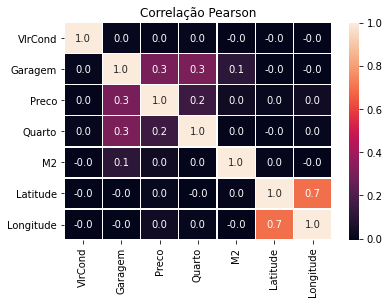

In [75]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.4)
plot
plt.title ("Correlação Pearson")

Text(0.5, 1.0, 'Correlação Kendall')

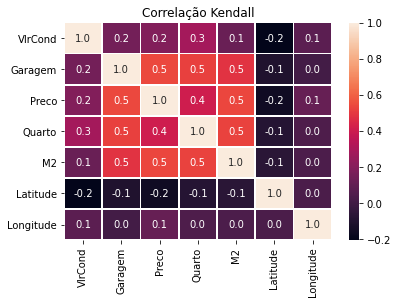

In [76]:
plot = sns.heatmap(correlacao2, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Kendall")

Text(0.5, 1.0, 'Correlação Spearman')

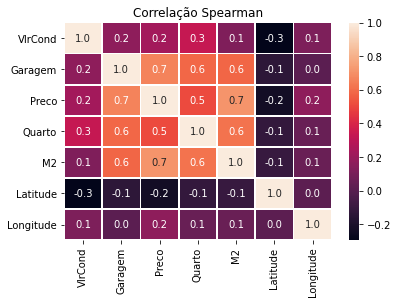

In [79]:
plot = sns.heatmap(correlacao3, annot = True, fmt=".1f", linewidths=.6)
plot
plt.title ("Correlação Spearman")

In [80]:
dtlimpo = dt.drop('Bairro', 1)

In [81]:
dtlimpo.head()

,Endereco,VlrCond,Garagem,Preco,Quarto,M2,Cidade,Latitude,Longitude
0,Rua Buritizeiro,0,10.0,11990000.0,4.0,4000.0,Belo Horizonte,-17.373120,-44.975675
1,Rua Vinicius de Morais,1100,3.0,680000.0,4.0,130.0,Belo Horizonte,-18.211555,-45.235415
2,Rua Porto 935,150,1.0,190000.0,2.0,60.0,Belo Horizonte,-18.587633,-46.507540
3,Rua Adauto Lucio Cardoso,0,4.0,2100000.0,4.0,350.0,Belo Horizonte,-18.763547,-44.424484
4,Rua Adauto Lucio Cardoso 46,0,4.0,3200000.0,4.0,387.0,Belo Horizonte,-18.763547,-44.424484


In [82]:
dtlimpo = dtlimpo.drop('Cidade', 1)


In [86]:
dtlimpo = dtlimpo.drop('Endereco', 1)

In [87]:
dtlimpo.head()

,VlrCond,Garagem,Preco,Quarto,M2,Latitude,Longitude
0,0,10.0,11990000.0,4.0,4000.0,-17.373120,-44.975675
1,1100,3.0,680000.0,4.0,130.0,-18.211555,-45.235415
2,150,1.0,190000.0,2.0,60.0,-18.587633,-46.507540
3,0,4.0,2100000.0,4.0,350.0,-18.763547,-44.424484
4,0,4.0,3200000.0,4.0,387.0,-18.763547,-44.424484


In [88]:
dtlimpo.dtypes

VlrCond        int64
Garagem      float64
Preco        float64
Quarto       float64
M2           float64
Latitude     float64
Longitude    float64
dtype: object

In [94]:
#!pip install geopandas 

In [95]:
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import matplotlib.pyplot as plt

In [96]:
#scatter_plot = plt.scatter(dtlimpo['Longitude'], dtlimpo['Latitude'], alpha=0.5 )
#plt.show()

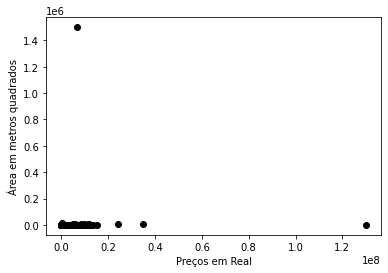

In [ ]:
# Pontos do Gráfico na côr Preta (c = 'k')
plt.scatter(dtlimpo['Preço'], dtlimpo['M2'], c='k')

plt.xlabel("Preços em Real")
plt.ylabel("Área em metros quadrados")

plt.show()

In [97]:
!pip install folium

In [98]:
import folium

In [99]:
mapa = folium.Map(location=[-19.9058278,-44.0005287])
mapa

In [100]:
#Estilos diferentes
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Toner',
)

In [101]:
folium.Map(
    location=[-19.9058278,-44.0005287],
    tiles='Stamen Terrain',
)

In [102]:
from folium import plugins

In [103]:
dtlimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5922 entries, 0 to 5921
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VlrCond    5922 non-null   int64  
 1   Garagem    5921 non-null   float64
 2   Preco      5921 non-null   float64
 3   Quarto     5921 non-null   float64
 4   M2         5921 non-null   float64
 5   Latitude   5921 non-null   float64
 6   Longitude  5921 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 324.0 KB


In [130]:
#Colocando as coordenadas para a geração do gráfico
coordenadas=[]
for Latitude,Longitude in zip(dtlimpo.Latitude.values[:5922],dtlimpo.Longitude.values[:5922]):
  coordenadas.append([Latitude,Longitude])

In [131]:
coordenadas

[[-17.3731203, -44.975675],
 [-18.2115555, -45.2354149],
 [-18.5876329, -46.5075405],
 [-18.763547, -44.4244838],
 [-18.763547, -44.4244838],
 [-18.763547, -44.4244838],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41.1217768],
 [-18.8647762, -41

In [128]:
# Renderizando o mapa com algumas personalizações:
#mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
#localização do Senac Rio Preto
#mapa = folium.Map(location=[-20.8149,-49.3773],zoom_start=5,tiles='')




In [132]:
# Adicionando os registros no mapa de calor:
# 1 - Será criado um totalizador por bairro para saber quantidade de imoveis disponiveis
# 2 - Identificação de maior valor para o menor, por latitude x Longitude
#mapa.add_child(plugins.HeatMap(coordenadas))        
mapa